# **What Makes a Udemy Top-selling Course?**

![Udemy_logo.svg.png](attachment:70e7a6e8-6129-4cd0-b704-78885aea3595.png)

## **Introduction & Motivation**
---

The USD 67.18 billion Massive Open Online Courses (MOOC) industry has become one of the most popular ways to acquire new skills, and the industry is predicted to grow at a CAGR of 37.2% from 2021 to 2027. Its popularity comes from the fact that it is easily accessible, affordable, and provides flexible ways for students to learn new skills depending on their learning preferences. With 54 million students, 204k courses, and 71k instructors teaching courses in 75+ languages, Udemy is one of the biggest platforms among these MOOCs. 

A business challenge for Udemy is creating new courses that will be popular among customers. As the MOOC market is highly saturated with many other industry rivals, it can be challenging to win over customers from other course providers who release similar content. By analyzing 5 merged datasets from Kaggle, we aim to help Udemy utilize its resources optimally by creating more content that customers prefer. Doing so will not only increase customer satisfaction and retain customers, it will also generate more revenue for Udemy. To achieve this win-win situation, we seek to identify trends by looking at the course characteristics customers prefer and title keywords that may capture their interest to purchase a course. 

Finally, our goal is to recommend new course types Udemy should release to satisfy customer demands and how they can market keywords to quickly capture customer attention and increase the likelihood of purchases.

## **Report Summary**
---
Our report is divided into two sections. In **revenue analysis**, we found that courses in the IT & Software has the greatest potential to generate more revenue for Udemy. We deduced that customers are willing to pay higher prices for higher quality courses, that SkillsFuture classes are priced higher than the average in each course category, and that some instructors have led more successful courses with more subscribers than others. In **ratings analysis**, we discovered that some lower-rated courses generate more revenue than higher-rated ones, and we suspect that different population sizes may have impacted average ratings. We also found that average ratings are positively correlated with subscribers and revenue, SkillsFuture courses are rated higher than average, and that there are popular keywords that are used in titles.

Combining the insights we found from these two sections, we made several recommendations for Udemy that focus on the components that will best maximize revenue.

## **Project Proposal**
---
Our main focus was to identify the characteristics shared between Udemy's **highest revenue-generating** courses. In addition, we also identified the **highest average rated courses**. As our goal is to maximize Udemy's revenue potential, we must pinpoint features shared among popular courses and understand why having those features makes these courses more appealing to customers. Once we pinpoint what these shared characteristics are, we can apply the same strategy to new courses and increase its chances of success (or being popular among customers).

Through insights generated in the Exploratory Data Analysis (EDA) process, our goal is to provide recommendations for the launch of Udemy's new courses. Examples of recommendations include suggesting what keywords to include in course titles, supporting materials to use in each course, and the price for different courses.


## **Data Sources**
---
1. Jil Kothari. (2020). <i>IT &amp; Software Courses Udemy - 22k+ courses</i> [Data set]. Kaggle (https://doi.org/10.34740/KAGGLE/DSV/1554788) 
2. Jil Kothari. (2020). <i>Business Courses - Udemy (10k courses)</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1489532 
3. Jil Kothari. (2020). <i>LifeStyle Courses - Udemy (39K+ course)</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1611305
4. Jil Kothari. (2020). <i>Finance &amp; Accounting Courses - Udemy (13K+ course)</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1494962
5. Keliza Toh. (2021; August). <i>Udemy Courses, Version 1.</i> Retrieved September24, 2022 from https://www.kaggle.com/datasets/kelizatoh/udemy-courses

From Kaggle, we downloaded 5 datasets. 4 of these datasets were published by Jil Kothari and contain course entries from different categories: Business, Finance & Accounting, IT & Software, and Lifestyle. The data was collected in 2020, using Python to scrape data from Udemy's website. For the 4 datasets, Jil provided 20 columns that captured the number of subscribers, ratings, prices, and additional resources such as lectures and practice tests. Columns across datasets had identical titles, which simplified the merging process.
- In the Business category, Jill extracted data related to 10k courses. 
- In the Finance & Accounting category, Jill extracted data related to 13k courses.
- In the IT & Software category, Jill extracted data related to 22k courses.
- In the Lifestyle category, Jill extracted data related to39k courses. 

The 5th dataset was published by Keliza Toh and collected in 2021. This dataset contained 20 columns, but unlike Jil's, Keliza's data captured more information on course categories, subcategories, and instructors. We merged this 5th dataset with our first 4 datasets because it contained additional information pertinent to our analysis. The total number of rows is 4,655.

## **Data Cleaning Process**
---
**Step 1**: Retrieved and uploaded the raw datasets from Kaggle onto GCP. 

**Step 2:** Created an **empty column called 'Source_File'**, and filled the column with corresponding values with the following query. This is to label which category each course belongs to, which we use for analysis further along in our research. We also added a column called **'last_date_data_extracted'** with null value, and then replaced it with a default date, the date when the data was originally extracted. 

In [ ]:
%%bigquery

UPDATE `ba-775-project-a05.RAW_DATA_SET.Business_courses`
SET    Source_File = 'Business'
WHERE Source_File IS NULL;

UPDATE `ba-775-project-a05.RAW_DATA_SET.Finance_courses`
SET    Source_File = 'Finance'
WHERE Source_File IS NULL;

UPDATE `ba-775-project-a05.RAW_DATA_SET.IT_courses`
SET    Source_File = 'IT'
WHERE Source_File IS NULL;

UPDATE `ba-775-project-a05.RAW_DATA_SET.Lifestyle_courses`
SET    Source_File = 'Lifestyle'
WHERE Source_File IS NULL;

Query complete after 0.02s: 100%|██████████| 1/1 [00:00<00:00, 183.88query/s] 


""


**Step 3:** To avoid encountering errors when creating a new table, we **renamed columns with duplicated names** using the following query.

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba-775-project-a05.RAW_DATA_SET.Udemy_all_courses_final` AS
SELECT * EXCEPT(Title), 
    Title AS NameOfCourse
FROM `ba-775-project-a05.RAW_DATA_SET.Udemy_all_courses`;

Query complete after 0.01s: 100%|██████████| 3/3 [00:00<00:00, 540.43query/s]                         


""


**Step 4:** Next, we **merged** the first 4 datasets vertically (using UNION) with the fifth dataset horizontally (using JOIN).

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba-775-project-a05.Clean_Process.Clean_Data_1` AS (

WITH merged_courses_dataset AS #--4 datasets (finanace course + lifestyle cours + Software IT course + Business Courses)--
(
SELECT * 
FROM `ba-775-project-a05.RAW_DATA_SET.IT_courses` AS software_it_courses
UNION ALL
SELECT *
FROM `ba-775-project-a05.RAW_DATA_SET.Finance_courses` AS finance_courses
UNION ALL
SELECT *
FROM `ba-775-project-a05.RAW_DATA_SET.Lifestyle_courses` AS lifestyle_courses 
UNION ALL
SELECT *
FROM `ba-775-project-a05.RAW_DATA_SET.Business_courses` AS business_courses 
) #4 course dataset inner join with Udemy all courses to find the courses which title matches with udemy all courses to add some additional columns and Insights--
SELECT *   
FROM merged_courses_dataset
INNER JOIN `ba-775-project-a05.RAW_DATA_SET.Udemy_all_courses_final` AS udemy_all_courses
ON merged_courses_dataset.title = udemy_all_courses.NameOfCourse)


Query complete after 0.01s: 100%|██████████| 4/4 [00:00<00:00, 755.39query/s]                         


""


**Step 5:** Then, we **dropped null values** in columns such as price. During our process:
- We encountered a bug we could not resolve through BigQuery because the original datasets from Kaggle had null values in some columns. The problem was, once uploaded into GCP, columns which previously had **some null values** became columns **full of null values**. 
- We solved the problem by using Excel to replace these **'null'** cells with **string 'null'**. After this fix, the columns were readable in GCP. 
- This is why we used **= 'null'** instead of IS NULL after the WHERE clause in the following code. This change also led us to format values in the price column as strings.

In [ ]:
%%bigquery

DELETE FROM `ba-775-project-a05.Clean_Process.Clean_Data_1` 
WHERE discount_price__amount = 'null' 
    OR discount_price__currency = 'null' 
    OR discount_price__price_string = 'null'
    OR price_detail__amount = 'null'
    OR price_detail__currency = 'null'
    OR price_detail__price_string = 'null'
    OR avg_rating IS NULL;
    
# To get meaningful analysis from chosen columns, we must drop rows with nulls.

Query complete after 0.02s: 100%|██████████| 4/4 [00:00<00:00, 525.93query/s]                         


""


**Step 6:** We now have columns with meaningful titles. We will now **drop columns that are insignificant for our research** and further adjust other columns.

Adjustments:
- Replaced the name of the previously created column 'Category' with 'source_files'. This is to avoid confusion during our analysis phase as the fifth dataset contains a 'Category_1' column.
- Converted the price from INR to USD by dividing the price column by 80.
- Created a column called 'revenue_in_USD' by multiplying price_in_USD with num_subscribers.

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba-775-project-a05.Clean_Process.Clean_Data_1` AS
SELECT * EXCEPT (
            int64_field_0, 
            url,
            NameOfCourse,
            avg_rating_recent, 
            rating, 
            created, 
            discount_price__currency, 
            discount_price__price_string, 
            price_detail__currency, 
            price_detail__price_string, 
            Overall_Rating, 
            Best_Rating, 
            Worst_Rating, 
            Price, 
            Discounted_Price), 
            (SAFE_CAST(price_detail__amount AS INT)/80) AS Price_in_USD, 
            ((SAFE_CAST(price_detail__amount AS INT)/80) * num_subscribers) AS revenue_in_USD,
FROM `ba-775-project-a05.Clean_Process.Clean_Data_1`

Query complete after 0.01s: 100%|██████████| 3/3 [00:00<00:00, 495.51query/s]                         


""


**Step 7:** 
In the this step of data cleaning, we removed:
- duplicated rows based on ID and title
- helper and original price columns

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-project-a05.Clean_Process.Clean_Data_2` AS(
    With id_c AS
    (SELECT  *
    FROM    (SELECT *,
             ROW_NUMBER() OVER (PARTITION BY id ) AS RowNumber1
             FROM   `ba-775-project-a05.Clean_Process.Clean_Data_1`) AS a
    WHERE   a.RowNumber1 = 1) 
          SELECT  *
          FROM    (SELECT *,
                  ROW_NUMBER() OVER (PARTITION BY title ) AS RowNumber2
                  FROM   id_c) AS b
          WHERE   b.RowNumber2 = 1);

CREATE OR REPLACE TABLE `ba-775-project-a05.Clean_Process.Clean_Data_Final` AS
SELECT * EXCEPT(RowNumber1, RowNumber2,discount_price__amount, price_detail__amount) FROM `ba-775-project-a05.Clean_Process.Clean_Data_2`;

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 394.98query/s] 


""


**Step 8:**
In the **final step** of data cleaning, We added a column titled 'last date data extracted' with a default date corresponding to the date the data was extracted by the author of the dataset. The column was introduced to identify the number of days that elapsed between the launch of the course and the date the data was extracted, which could be relevant for future data analysis.


In [ ]:
%%bigquery

ALTER TABLE `ba-775-project-a05.Clean_Process.Clean_Data_Final`
ADD COLUMN last_date_data_extracted date;


Query complete after 0.01s: 100%|██████████| 1/1 [00:00<00:00, 697.42query/s] 


""


In [ ]:
%%bigquery

UPDATE `ba-775-project-a05.Clean_Process.Clean_Data_Final`
SET    last_date_data_extracted = date(2020,11,01)
Where last_date_data_extracted is null

Query complete after 0.01s: 100%|██████████| 4/4 [00:00<00:00, 771.83query/s]                         


""


In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba-775-project-a05.Clean_Process.Clean_Data_Final` AS
SELECT * EXCEPT(id), new_column.id
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` AS clean_data_final
INNER JOIN 
(SELECT id, DATE_DIFF(last_date_data_extracted, DATE(published_time), DAY) + 1 AS days_passed_sine_launch
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`) AS new_column
ON clean_data_final.id = new_column.id

Query complete after 0.01s: 100%|██████████| 4/4 [00:00<00:00, 793.06query/s]                         


""


In [ ]:
%%bigquery

SELECT title,DATE_DIFF(last_date_data_extracted, DATE(published_time), DAY) + 1 AS days_passed_sine_launch
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`

Downloading: 100%|██████████| 4655/4655 [00:01<00:00, 3236.38rows/s]


,title,days_passed_sine_launch
0,SAP OO ABAP Objects with Real Time Examples an...,2112
1,How To Install Your Own SAP Trial System Free,2487
2,SAP BPC Embedded Fundamentals for Planning App...,1467
3,Introduction to Statistics,977
4,Tutor for iMovie,1650
...,...,...
4650,Creative Writing: Creative Exercises For New W...,1138
4651,YouTube SEO: How to Rank #1 on YouTube,1537
4652,Job Interviewing: Complete Job Interview Succe...,1679
4653,Typing 101: Typing Course Basics & Improve You...,884


In [ ]:
%%bigquery

SELECT * 
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`;

Downloading: 100%|██████████| 4655/4655 [00:01<00:00, 4060.93rows/s]


,title,is_paid,num_subscribers,avg_rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,Source_File,...,No_of_Articles,No_of_Coding_Exercises,Video_Duration_Hr,No_of_Additional_Resources,Bestseller,Price_in_USD,revenue_in_USD,last_date_data_extracted,days_passed_sine_launch,id
0,SAP OO ABAP Objects with Real Time Examples an...,True,10411,4.12500,239,False,60,0,2015-01-21 19:12:01+00:00,Lifestyle,...,2,0,6.0,2,False,16.0,166576.0,2020-11-01,2112,395570
1,How To Install Your Own SAP Trial System Free,True,6205,2.80000,669,False,10,0,2014-01-11 20:59:17+00:00,Lifestyle,...,0,0,1.0,0,False,16.0,99280.0,2020-11-01,2487,140976
2,SAP BPC Embedded Fundamentals for Planning App...,True,1150,4.20588,318,False,32,0,2016-10-27 18:51:36+00:00,Lifestyle,...,0,0,3.5,29,False,16.0,18400.0,2020-11-01,1467,919824
3,Introduction to Statistics,True,1266,4.40000,68,False,24,0,2018-03-01 15:06:32+00:00,IT,...,0,0,2.5,7,False,16.0,20256.0,2020-11-01,977,1575094
4,Tutor for iMovie,True,353,4.35000,72,False,49,0,2016-04-27 17:47:03+00:00,Lifestyle,...,0,0,4.0,0,False,16.0,5648.0,2020-11-01,1650,815548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,Creative Writing: Creative Exercises For New W...,True,5905,4.43750,191,False,90,0,2017-09-21 23:52:09+00:00,Lifestyle,...,1,0,3.0,36,False,152.0,897560.0,2020-11-01,1138,1343832
4651,YouTube SEO: How to Rank #1 on YouTube,True,8960,4.27344,952,False,35,0,2016-08-18 14:35:15+00:00,Lifestyle,...,1,0,2.5,0,False,152.0,1361920.0,2020-11-01,1537,934032
4652,Job Interviewing: Complete Job Interview Succe...,True,31354,4.45455,676,False,111,0,2016-03-29 22:02:13+00:00,Lifestyle,...,0,0,6.0,6,False,152.0,4765808.0,2020-11-01,1679,730594
4653,Typing 101: Typing Course Basics & Improve You...,True,3633,4.10000,212,False,45,0,2018-06-02 01:53:18+00:00,Lifestyle,...,4,0,1.5,4,False,160.0,581280.0,2020-11-01,884,1692544


**Step 9:** We merged 5 tables to extract data on different course categories. 
These courses include 'Business_course', 'Finance_course', 'IT_course', 'Lifestyle_course', and more general 'Udemy_course'. Shown below is the **metadata** of our merged datasets.

Column                       |Dtype           |Description                                                        |
---                          |---             |---                                                                |
id                           |INTEGER         |ID of the course                                                   |
title                        |STRING          |Title of the course                                                |
is_paid                      |BOOLEAN         |URL of the course                                                  |
num_subscribers              |INTEGER         |Number of subscribers                                              |
avg_rating                   |FLOAT           |Average rating of the course                                       |
num_reviews                  |INTEGER         |Number of ratings received                                         |
is_wishlisted                |BOOLEAN         |Shows if the course is wishlisted                                  |
num_published_lectures       |INTEGER         |Number of published lectures offered                               |
num_published_practice_tests |INTEGER         |Number of published practice offered                               |
published_time               |TIMESTAMP       |The published time of the course                                   |
Source_File                  |STRING          |The source file the entry was originally stored                    |
No_of_Ratings                |INTEGER         |Number of rating received                                          |
Category                     |STRING          |Category which the course falls under                              |
Subcategory                  |STRING          |Subcategory(detailed) which the course falls under                 |
Topic                        |STRING          |Topic which the course falls under                                 |
Instructor                   |STRING          |Name of the course instrutor                                       |
Language                     |STRING          |Language in which course is conducted in                           |
SkillsFuture                 |BOOLEAN         |Whether the course is SkillsFuture credit_eligible **                 |
No_of_Practice_Test          |INTEGER         |Number of published practice offered                               |
No_of_Articles               |INTEGER         |Number of articles provided                                        |
No_of_Coding_Exercises       |INTEGER         |Number of coding exercises provided                                |
Video_Duration_Hr            |FLOAT           |Total duration of videos provided.                                 |
No_of_Additional_Resources   |INTEGER         |Number of additional resources provided                            |
Bestseller                   |BOOLEAN         |Whether the course is ranked top 10% on sales                      |
Price_in_USD                 |FLOAT           |Course price in USD                                                |
revenue_in_USD               |FLOAT           |Revenue, which is the product num_subscribers and Price_in_USD     |
last_date_data_extracted     |DATE            |The date when data was scraped from the Udemy website              |
days_passed_since_launch     |INTEGER         |Days passed from the launch date to the extraction date            |

** **SkillsFuture** credits are a way for the Singaporean government to motivate citizens to advance their skills in any job. A certain amount of SkillsFuture credits are given to citizens and can be used to pay for government-approved courses that are related to their work-skills related. In addition to government-approved resources, Singaporeans can also claim SkillsFuture credits to be reimbursed for using MOOCs offered overseas, which is why some Udemy courses are eligible for SkillsFuture credit.

## **Assumptions**
---
- All subscribers purchased the course at the original price.
- The exchange rate assumed to convert INR to USD was 80 INR = 1 USD. 
- The data is not regarded as highly skewed. 

## **Limitations** 
---
- There are no subscriber demographics available to target a specific audience. 
- Data on the time of purchase is unavailable for calculating cash flow. 
- Concentrating on a single category as opposed to all categories.
- Data extracted is only up to 2020.

##  **Dataset Exploration**
---

This section is divided into two subsections. We will first be exploring **revenue-related** questions and then **ratings-related** questions.

**Exploring Revenue-related Questions**

As described in our Project Proposal, our ultimate goal is to help maximize Udemy's revenue potential by recommending strategies on what characteristics new courses should have to increase their chances of being popular amongst customers. Our first step was identifying which courses and categories generated the highest revenue for the company. Then with more research, we explored different combinations of factors that generated high revenue. We investigated granular course details such as the number of subscribers, the prices of courses, and which instructors generated the most revenue. We provided our questions in the following list below.


**Exploring Ratings-related Questions**

It is also important to account for course ratings to increase Udemy's revenue because a high average rating will likely attract new customers to buy a course. In this section, we will explore which courses and categories are most favorably rated by customers and examine the features shared among these courses to understand why having those features leaves customers more satisfied with purchasing the product.

### **Questions on revenue-generation and number of subscribers:**

1. Top 5 categories that generate the highest revenue
2. Daily average revenue generated per course for each category
3. Top 5 highest generated revenue courses from the IT & Software Category
4. Average price of courses for each category
5. Does having an eligible SkillsFuture credit impact the daily revenue generated by courses?
6. Are average SkillsFuture course prices per category higher than category average prices?
7. Top 5 categories with the highest average number of subscribers per course
8. Top 5 courses with the highest number of subscribers for each category
9. Average number of subscribers per course for each category
10. Top 5 instructors with the highest average revenue per course and the total revenue they have generated

#### **Q1: Top 5 categories that generate the highest revenue**

The result shows us a high-level understanding of high revenue-generating categories. The top 5 **highest revenue-generating categories** are:
1. Business
2. Design
3. Marketing
4. IT & Software
5. Personal Development	

In [ ]:
%%bigquery

SELECT Category, Round(SUM(revenue_in_USD)/1000000,2) AS Revenue_in_millions_USD
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
GROUP BY Category
ORDER BY Revenue_in_millions_USD DESC;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  9.68rows/s]


,Category,Revenue_in_millions_USD
0,Business,687.14
1,Design,641.23
2,Marketing,604.03
3,IT & Software,508.03
4,Personal Development,500.58
5,Finance & Accounting,232.23
6,Office Productivity,204.95
7,Lifestyle,157.78
8,Development,34.82
9,Teaching & Academics,2.92


![Q1.png](attachment:Q1.png)

#### **Q2: Daily average revenue generated per course for each category**

The **IT & Software category courses generated the highest daily average revenue of USD 2,002.66 per course**, followed by the Development category courses with an average of USD 1,291.28 per course, and Design category courses with an average of USD 1,113.58 per course. We believe this is a better indicator to capture which category has the greatest potential to generate more revenue with every additional course provided. 

On the other hand, Photography & Video courses generated the lowest average of USD 120 thousand per course; this suggests that courses in the **IT & Software, Development, and Business category have more potential to generate more revenue**.

In [ ]:
%%bigquery

WITH TEMP AS(
  
  WITH TEMP1 AS(
  SELECT id,(DATE_DIFF(last_date_data_extracted, DATE(published_time), DAY) ) AS days_passed_sine_launch
  FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
  )
  ,

  TEMP2 AS(
  SELECT *
  FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
  )

  SELECT 
  TEMP1.days_passed_sine_launch, 
  TEMP2.revenue_in_USD,
  TEMP2.revenue_in_USD/TEMP1.days_passed_sine_launch as Avg_Revenue_Per_Day,
  TEMP2.category
  FROM TEMP1 INNER JOIN TEMP2 ON TEMP1.id = TEMP2.id
)

SELECT Category, ROUND(AVG(Avg_Revenue_Per_Day),2) as Avg_Rev_of_a_Course_Per_Day
FROM TEMP
GROUP BY Category
ORDER BY Avg_Rev_of_a_Course_Per_Day DESC
;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  9.21rows/s]


,Category,Avg_Rev_of_a_Course_Per_Day
0,IT & Software,2001.23
1,Development,1291.28
2,Marketing,1063.07
3,Leadership & Management,1048.18
4,Design,965.06
5,Office Productivity,910.99
6,Business,893.29
7,Personal Development,714.48
8,Finance & Accounting,572.12
9,Health & Fitness,350.51


![Q2%20.png](attachment:Q2%20.png)

#### **Q3: Top 5 highest generated revenue courses from the IT & Software Category**

From Question 2, we deduced that IT & Software category courses generate the highest daily revenue of USD 2,002.66 per course. Using the information from this query, we will examine the revenue, the number of subscribers, and the prices of the top 5 courses in the highest revenue-generating category.

A major takeaway from this query (and in comparison to the output found in Q4) is that **customers are willing to pay high prices ($100+) for quality courses**.

In [ ]:
%%bigquery

SELECT * 
FROM                   
    (
    SELECT 
    ROW_NUMBER() OVER (PARTITION BY Category ORDER BY revenue_in_USD DESC) AS top_5_revenue_generated_course_in_each_category,
    category, 
    title, 
    ROUND(revenue_in_USD/1000000, 2) AS revenue_in_million_USD,         
    ROUND(num_subscribers/1000, 2) AS num_subscribers_in_thousands, 
    Price_in_USD AS price_of_the_course # price of the individual course
    FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
    )
WHERE top_5_revenue_generated_course_in_each_category <=5
AND category = 'IT & Software'
ORDER BY Category
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.94rows/s]


,top_5_revenue_generated_course_in_each_category,category,title,revenue_in_million_USD,num_subscribers_in_thousands,price_of_the_course
0,4,IT & Software,The Complete Ethical Hacking Course!,19.91,184.32,108.0
1,1,IT & Software,Learn Ethical Hacking From Scratch,40.27,372.90,108.0
2,2,IT & Software,The Complete Ethical Hacking Course: Beginner ...,29.96,277.38,108.0
3,5,IT & Software,The Complete Cyber Security Course : Hackers E...,15.84,165.03,96.0
4,3,IT & Software,Linux for Absolute Beginners!,21.58,199.83,108.0


![Q3..png](attachment:Q3..png)

In [ ]:
%%bigquery

#
SELECT Category, AVG(price_of_the_course) AS Average_price_of_top_5_Coures_of_Categories FROM
(SELECT * 
FROM                   
    (
    SELECT 
    ROW_NUMBER() OVER (PARTITION BY Category ORDER BY revenue_in_USD DESC) AS top_5_revenue_generated_course_in_each_category,
    category, 
    title, 
    ROUND(revenue_in_USD/1000000, 2) AS revenue_in_million_USD,         
    ROUND(num_subscribers/1000, 2) AS num_subscribers_in_thousands, 
    Price_in_USD AS price_of_the_course # price of the individual course
    FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
    )
WHERE top_5_revenue_generated_course_in_each_category <=5
#AND category = 'IT & Software'
ORDER BY Category)
GROUP BY Category
ORDER BY Category

Downloading: 100%|██████████| 13/13 [00:01<00:00, 11.02rows/s]


,Category,Average_price_of_top_5_Coures_of_Categories
0,Business,119.2
1,Design,102.4
2,Development,108.0
3,Finance & Accounting,109.6
4,Health & Fitness,89.6
5,IT & Software,105.6
6,Leadership & Management,108.0
7,Lifestyle,108.8
8,Marketing,115.2
9,Office Productivity,108.0


#### **Q4: Average price of courses for each category**

The following query was run to understand the average price of a course for each category. The average price acts as a benchmark and helps determine what price courses in a particular category should be. For example, we discovered that Leadership & Management courses have the highest average price of USD 108 per course. 

It was interesting to note that the **overall average price** of courses in the IT & Software, Development, and Business category **is lower than the top 5 highest revenue-generating courses (per category)'s average price** found in Q2. For our conclusion, we will need to determine and justify why new courses should be priced closer to either the overall average price of to the top 5 average price. 

**Overall average price** vs **Top 5 average price per category** comparison:
- IT & Software: USD 68 vs USD 105.6 
- Development USD 65 vs USD 108
- Business: USD 71 vs USD 119.2

In [ ]:
%%bigquery

SELECT Category, ROUND(AVG(Price_in_USD),0) AS avg_price 
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
GROUP BY Category
ORDER BY ROUND(AVG(Price_in_USD)) DESC;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  8.45rows/s]


,Category,avg_price
0,Leadership & Management,108.0
1,Health & Fitness,77.0
2,Business,71.0
3,IT & Software,68.0
4,Marketing,67.0
5,Development,65.0
6,Finance & Accounting,64.0
7,Personal Development,63.0
8,Design,61.0
9,Office Productivity,57.0


![Q4.png](attachment:Q4.png)

#### **Q5: Does having an eligible SkillsFuture credit impact the daily revenue generated by courses?**

In the following 4 queries, we examine the relationships between SkillsFuture and revenue column. 
- Out of the **1000 highest revenue generated sources, 181 of them are SkillsFuture courses**. 
- In contrast, out of the **1000 lowest revenue generated sources, none of them is a SkillsFuture course**. 

The **average revenue for SkillsFuture courses is USD 4.36 thousand** while the **average revenue for nonSkillsFuture courses is only USD 3.43 thousand**. From our query results, we can assume that a SkillsFuture status made courses more popular to customers, and in turn increased revenue.

In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, Revenue_in_USD/days_passed_sine_launch as Rev_Per_Day
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
     ORDER BY Rev_Per_Day DESC 
     LIMIT 1000)

SELECT COUNT(SkillsFuture) AS Count_Of_True_In_1000_Highest_Revenue_Cources
FROM TEMP
WHERE SkillsFuture IS TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.07s/rows]


,Count_Of_True_In_1000_Highest_Revenue_Cources
0,181


In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, Revenue_in_USD/days_passed_sine_launch as Rev_Per_Day
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
     ORDER BY Rev_Per_Day ASC 
     LIMIT 1000)

SELECT COUNT(SkillsFuture) AS Count_Of_True_In_1000_Highest_Revenue_Cources
FROM TEMP
WHERE SkillsFuture IS TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.13s/rows]


,Count_Of_True_In_1000_Highest_Revenue_Cources
0,1


In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, Revenue_in_USD/days_passed_sine_launch as Rev_Per_Day
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
     ORDER BY Rev_Per_Day DESC 
     LIMIT 1000)
SELECT ROUND(AVG(Rev_Per_Day)/1000,2) AS Avg_Rev_Per_Day_In_Thousands_SF_Is_True
FROM TEMP
WHERE SkillsFuture IS TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.55s/rows]


,Avg_Rev_Per_Day_In_Thousands_SF_Is_True
0,4.34


In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, Revenue_in_USD/days_passed_sine_launch as Rev_Per_Day
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
     ORDER BY Rev_Per_Day DESC 
     LIMIT 1000)
SELECT ROUND(AVG(Rev_Per_Day)/1000,2) AS Avg_Rev_Per_Day_In_Thousands_SF_Is_False
FROM TEMP
WHERE SkillsFuture IS NOT TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.12s/rows]


,Avg_Rev_Per_Day_In_Thousands_SF_Is_False
0,3.43


#### **Q6: Are average SkillsFuture course prices per category higher than category average prices?**

On average, **SkillsFuture course prices per category are higher than category average prices**. This is likely because SkillsFuture courses provide value as a form of certification and thus help individuals appear more credible and employable in the work field. 

In [ ]:
%%bigquery

WITH TMP1 AS (
SELECT Category, 
  ROUND(AVG(Price_in_USD), 2) AS Avg_Price_SF_Course
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
WHERE SkillsFuture IS TRUE
GROUP BY Category
ORDER BY Avg_Price_SF_Course DESC
),

TMP2 AS (
SELECT Category, 
  ROUND(AVG(Price_in_USD), 2) AS Avg_Price_For_Category
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
GROUP BY Category
ORDER BY Avg_Price_For_Category DESC
)

SELECT TMP1.Category, TMP1.Avg_Price_SF_Course, TMP2.Avg_Price_For_Category
FROM 
TMP1 INNER JOIN TMP2
ON TMP1.Category = TMP2.Category
ORDER BY Avg_Price_SF_Course DESC
;

Downloading: 100%|██████████| 9/9 [00:01<00:00,  7.21rows/s]


,Category,Avg_Price_SF_Course,Avg_Price_For_Category
0,Marketing,107.84,66.62
1,Personal Development,104.44,63.18
2,Business,100.25,71.38
3,Finance & Accounting,96.76,63.75
4,Lifestyle,92.00,54.58
5,Design,86.63,61.25
6,Office Productivity,84.46,56.84
7,IT & Software,80.50,67.66
8,Development,20.00,65.18


![Q6.png](attachment:Q6.png)

#### **Q7: Top 5 categories with the highest number of subscribers**

Since the number of subscribers directly affects revenue generation, we constructed a query to identify which categories have the highest number of average subscribers per course. We used an average as opposed to the sum of subscribers to yield a more accurate representation of the popularity of different categories. 

The top 5 categories with the **highest number of subscribers**.
1. Business
2. Design
3. Marketing
4. IT & Software
5. Personal Development

In [ ]:
%%bigquery

SELECT Category, ROUND(sum(num_subscribers)/1000, 2) as highest_subscribers_in_thousands FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
GROUP BY Category
ORDER BY SUM(num_subscribers) desc;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  9.70rows/s]


,Category,highest_subscribers_in_thousands
0,Business,7876.30
1,Design,7514.22
2,Marketing,6600.36
3,IT & Software,6155.62
4,Personal Development,5952.86
5,Finance & Accounting,2584.21
6,Office Productivity,2437.16
7,Lifestyle,2020.36
8,Development,352.50
9,Teaching & Academics,51.21


![Q7.png](attachment:Q7.png)

#### **Q8: Top 5 courses with the highest number of subscribers for  IT & Software category**

We executed this query to understand the preference of course takers and investigated the number of subscribers per category as it is one of the key metrics in this dataset. As we predicted, courses with a higher number of subscribers generally earned more revenue. Namely, the **Design, Business, and IT & Software category courses attracted the most subscribers**.

In [ ]:
%%bigquery

SELECT * 
FROM 
    (
    SELECT 
    ROW_NUMBER() OVER (PARTITION BY Category ORDER BY num_subscribers DESC) AS top_5_course_with_highest_subscribers_in_each_category,  #to rank each of the course based on subscribers for each category
    category, 
    title, 
    ROUND(num_subscribers/1000, 2) AS num_subscribers_in_thousands, 
    No_of_Ratings,
    ROUND(revenue_in_USD/1000000, 2) AS revenue_in_million_USD, 
    FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
    ) 
WHERE top_5_course_with_highest_subscribers_in_each_category <= 5
AND category = 'IT & Software'
ORDER BY Category, num_subscribers_in_thousands DESC
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.57rows/s]


,top_5_course_with_highest_subscribers_in_each_category,category,title,num_subscribers_in_thousands,No_of_Ratings,revenue_in_million_USD
0,1,IT & Software,Learn Ethical Hacking From Scratch,372.90,96886,40.27
1,2,IT & Software,The Complete Ethical Hacking Course: Beginner ...,277.38,28133,29.96
2,3,IT & Software,Linux for Absolute Beginners!,199.83,4075,21.58
3,4,IT & Software,The Complete Ethical Hacking Course!,184.32,3317,19.91
4,5,IT & Software,The Complete Cyber Security Course : Hackers E...,165.03,36691,15.84


![Q8.png](attachment:Q8.png)

#### **Q9: Average number of subscribers per course for each category per day**

The **IT & Software, Development, and Marketing category has the highest average number of subscribers per course**, with 25, 16, and 13 subscribers. Again, since revenue is a product of price and subscribers, it makes sense that courses with a higher number of average subscribers generate more revenue.

In [ ]:
%%bigquery

SELECT Category, ROUND(AVG((num_subscribers)/days_passed_sine_launch), 0) AS avg_subscribers 
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
GROUP BY Category
ORDER BY ROUND(AVG((num_subscribers)/days_passed_sine_launch)) DESC;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  9.12rows/s]


,Category,avg_subscribers
0,IT & Software,25.0
1,Development,16.0
2,Marketing,13.0
3,Design,12.0
4,Office Productivity,10.0
5,Business,10.0
6,Leadership & Management,10.0
7,Personal Development,9.0
8,Finance & Accounting,7.0
9,Lifestyle,4.0


#### **Q10: Top 5 instructors with the highest average revenue per course and the total revenue they have generated**

Instructors can play a factor for students when choosing a course. When students like a particular teaching-style a course is taught in, they are more likely to continue buying courses from the same instructor. 

The following are the **top 5 instructors** who have earned the the highest average revenue per course and the highest overall revenue for Udemy. 

1. Rob Percival
2. GameDev.tv Team 
3. Joseph Delgadillo 
4. Fabian Honhaiser
5. Ahmed Alkabary

In [ ]:
%%bigquery

WITH 
  TMP1 AS(
  With instructor_rev_by_course AS (
  SELECT SUM(revenue_in_USD) AS sum_r,COUNT(title) AS cnt, Instructor
  FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
  GROUP BY Instructor
  )

  SELECT 
    Instructor,
    instructor_rev_by_course.sum_r/cnt AS AVG_Reveune_Generated_Per_Course, 
    instructor_rev_by_course.sum_r AS Total_Revenue_Generated
  FROM instructor_rev_by_course 
  )

SELECT TMP1.*, TMP2.Category
FROM TMP1 

INNER JOIN 
(select distinct Instructor, Category
    from `ba-775-project-a05.Clean_Process.Clean_Data_Final`) TMP2

ON TMP1.Instructor = TMP2.Instructor
ORDER BY TMP1.AVG_Reveune_Generated_Per_Course DESC
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.34rows/s]


,Instructor,AVG_Reveune_Generated_Per_Course,Total_Revenue_Generated,Category
0,Rob Percival,54383724.0,54383724.0,Marketing
1,GameDev.tv Team,22229748.0,22229748.0,Design
2,Joseph Delgadillo,20744424.0,41488848.0,IT & Software
3,Fabian Honhaiser,18752688.0,18752688.0,Business
4,Ahmed Alkabary,15769376.0,15769376.0,IT & Software


![Q10.1.png](attachment:Q10.1.png)

## **Questions on course ratings:**
11. Top 5 highest rated courses for each category
12. Does a SkillsFuture credit have any impact on a course's rating?
13. Top 100 IT & Software course characteristics (video duration, lectures, articles, coding exercises, practice tests, additional resources)
14. Popular keywords used in course titles

#### **Q11: Top 5 highest rated courses for each category**

The **Lifestyle, Design, and IT & Software** categories scored the **highest overall average course rating**. However, it is interesting to note that despite having lower ratings, the Marketing, Design, and Business category generated the highest revenues. A possible reason behind this outcome could be that more customers have rated more Marketing, Design, and Business courses. With a higher population size, average ratings could be lower. This is why we created a **filter to identify high-average rated courses with a higher than average number of subscribers**; this way, we can pinpoint courses with more reliable high course-average ratings.

Again, we must remember that our main objective is to make recommendations to increase Udemy's bottom line. Since **high revenues are a product of high course prices and a high number of subscribers** and **high ratings are only correlated to revenue**, we will focus on optimizing course prices to increase subscribers and maximize revenue for our final recommendation.

In [ ]:
%%bigquery
SELECT * FROM                   
  (
  SELECT 
  ROW_NUMBER() OVER(PARTITION BY Category ORDER BY avg_rating DESC) AS top_5_rated_course_in_each_category, #top 5 courses/category based on rating
  category, 
  title,
  avg_rating,
  ROUND(revenue_in_USD/1000000, 2) AS revenue_in_million_USD,         
  num_subscribers, 
  Price_in_USD AS price_of_the_course #price of 1 course
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
WHERE No_of_Ratings > 
  (SELECT AVG(No_of_Ratings) # get the course with more subscribers, not new ones with higher but only few ratings
  FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`)
AND revenue_in_USD >
    (SELECT AVG(revenue_in_USD)
    FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`))
    WHERE top_5_rated_course_in_each_category <= 5 #limit to top 5 courses/category based on rating
ORDER BY Category
limit 10;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.22rows/s]


,top_5_rated_course_in_each_category,category,title,avg_rating,revenue_in_million_USD,num_subscribers,price_of_the_course
0,4,Business,How To Become A Shopify Expert (From Zero To H...,4.65579,2.77,25650,108.0
1,2,Business,The Real Estate Financial Modeling Bootcamp,4.66115,1.55,14308,108.0
2,5,Business,Tableau 20 Advanced Training: Master Tableau i...,4.63452,6.81,63084,108.0
3,1,Business,Recommender Systems and Deep Learning in Python,4.68267,1.27,11762,108.0
4,3,Business,Write a Bestselling Novel in 15 Steps (Writing...,4.65686,0.78,9750,80.0
5,5,Design,Adobe InDesign CC - Advanced Training Course,4.72222,1.80,14969,120.0
6,3,Design,Adobe Illustrator CC - Essentials Training Course,4.72961,5.09,47124,108.0
7,2,Design,Complete Web Design: from Figma to Webflow to ...,4.75727,1.04,9612,108.0
8,1,Design,Painting Environments,4.77329,0.87,9103,96.0
9,4,Design,Adobe InDesign CC - Essentials Training Course,4.72838,3.96,36663,108.0


#### **Q12: Does a SkillsFuture credit have any impact on a course's rating?**
 
In the following 4 queries, we examine the relationship between the SkillsFuture column and the average rating column. 
- Out of the 1000 **highest average rated** courses, 11 of them are SkillsFuture courses. 
- Out of the 1000 **lowest average rated** courses, 19 of them are SkillsFuture courses. 

Although the first two queries provided little insight, the last two queries provided slightly more important information. The average rating for IT & Software SkillsFuture courses are 4.46, while the average rating for nonSkillsFuture courses are 4.38. Since the **average rating for SkillsFuture courses are higher than for nonSkillsFuture courses**, we can assume that either SkillsFuture courses are:
1. better in quality as it supports mid-career individuals in acquiring industry-relevant skills to improve employability and pivot to new sectors or job roles.
2. favored because of its certification and its applicable to the work field.

In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, avg_rating 
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
     ORDER BY avg_rating DESC 
     LIMIT 1000)
SELECT COUNT(SkillsFuture) AS Count_Of_True_In_1000_Highest_Rating_Cources
FROM TEMP
WHERE SkillsFuture IS TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.18s/rows]


,Count_Of_True_In_1000_Highest_Rating_Cources
0,12


In [ ]:
%%bigquery

WITH TEMP AS 
    (SELECT SkillsFuture, avg_rating 
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
     ORDER BY avg_rating ASC LIMIT 1000)
SELECT COUNT(SkillsFuture) AS Count_Of_True_In_1000_Lowest_Rating_Cources
FROM TEMP
WHERE SkillsFuture IS TRUE;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.16s/rows]


,Count_Of_True_In_1000_Lowest_Rating_Cources
0,19


In [ ]:
%%bigquery  

SELECT Category, AVG(avg_rating) AS Avg_Rating_SF_Is_True
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
WHERE SkillsFuture IS TRUE AND Category = 'IT & Software'
GROUP BY Category;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.26s/rows]


,Category,Avg_Rating_SF_Is_True
0,IT & Software,4.448969


In [ ]:
%%bigquery  

SELECT AVG(avg_rating) AS Avg_Rating_SF_Is_False
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final` 
WHERE SkillsFuture IS NOT TRUE AND Category = 'IT & Software'
GROUP BY Category;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.18s/rows]


,Avg_Rating_SF_Is_False
0,4.382968


#### **Question 13: Top 100 IT & Software course characteristics (video duration, lectures, articles, coding exercises, practice tests, additional resources)**

The top 100 IT & Sofware courses are normally:
- Video duration (hours): 11.45
- Lectures: 99 
- Articles: 7 
- Coding exercises: <1
- Tests: <1
- Additional resources: 12

In [ ]:
%%bigquery  

WITH TEMP AS 
    (SELECT *
     FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
     WHERE Category = 'IT & Software'
     ORDER BY Revenue_in_USD/days_passed_sine_launch DESC 
     LIMIT 100)

SELECT 
    ROUND(AVG(Video_Duration_Hr),2) AS Avg_Video_Duration_Hr,
    ROUND(AVG(Num_published_lectures),2) AS Avg_Num_published_lectures,
    ROUND(AVG(No_of_Articles),2) AS Avg_Num_of_Articles,
    ROUND(AVG(No_of_Coding_Exercises),2) AS Avg_Num_of_Coding_Exercises,
    ROUND(AVG(No_of_Practice_Test),2) AS Avg_Num_of_Practice_Test,
    ROUND(AVG(No_of_Additional_Resources),2) AS Avg_Num_of_Additional_Resources 
FROM TEMP

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.39s/rows]


,Avg_Video_Duration_Hr,Avg_Num_published_lectures,Avg_Num_of_Articles,Avg_Num_of_Coding_Exercises,Avg_Num_of_Practice_Test,Avg_Num_of_Additional_Resources
0,11.45,99.2,7.26,0.93,0.36,12.51


#### **Q14: Popular keywords used in course titles**

The top keyword titles for IT & Software courses are:
1. 'Complete'
2. 'Linux'
3. 'Hacking'
4. 'Beginners'
5. 'Security'

These keywords will be used for the title of our **final recommendation** for launching a new Udemy course: 

- **"Linux Hacking: A Complete Guide for Beginners"**

In [ ]:
%%bigquery 

WITH TMP AS(
SELECT title, (revenue_in_USD/days_passed_sine_launch) AS avg_day_cource FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
WHERE Category = 'IT & Software'
AND (revenue_in_USD/days_passed_sine_launch) >= 
  (
  SELECT
    AVG(revenue_in_USD/days_passed_sine_launch) FROM`ba-775-project-a05.Clean_Process.Clean_Data_Final`
  #WHERE Category = 'IT & Software'
  )
  ORDER BY avg_day_cource DESC
)

SELECT keyword, COUNT(*) AS keyword_count, 
FROM `ba-775-project-a05.Clean_Process.Clean_Data_Final`
INNER JOIN TMP ON `ba-775-project-a05.Clean_Process.Clean_Data_Final`.title = TMP.title 
CROSS JOIN UNNEST(SPLIT(`ba-775-project-a05.Clean_Process.Clean_Data_Final`.title,' ')) AS keyword
WHERE Category = 'IT & Software'

AND keyword NOT IN ('-', ',', ':', 'and', 'The', 'the', 'for', 'With', 'with', '&', 'in', 'to', 'from', 'Course', 'Learn', 'TOTAL:')

GROUP BY keyword
ORDER BY keyword_count DESC;

Downloading: 100%|██████████| 305/305 [00:03<00:00, 83.43rows/s]


,keyword,keyword_count
0,Complete,17
1,Linux,17
2,Hacking,11
3,Beginners,9
4,Security,9
...,...,...
300,FICO,1
301,(Financial,1
302,Accounting,1
303,Accounting),1


![Q14.png](attachment:Q14.png)

# Visualization of Final Course Recommendation
---

![New_Poster.png](attachment:New_Poster.png)

# Conclusion
---

After our revenue analysis, we decided that 6 important characteristics must be identified in our course recommendation.
1. Udemy should release new courses in the IT & Software category because the courses in that category generate the highest daily average revenue.
2. Customers are willing to pay higher prices for better quality courses. Therefore, Udemy should release high-quality content at a higher price to generate more revenue. We recommended a price of USD 105 (average of the top 5 courses in the IT & Software category) for our recommended course.
3. Since SkillsFuture courses are more expensive than nonSkillsFuture courses for each category on average, new SkillsFuture courses should also be priced higher than average. We recommended a price of USD 108 for our recommended SkillsFuture course as SkillsFuture courses are normally slightly more expensive than nonSkillsFuture courses. 
4. The average video duration for the courses was around 11.45 hours long, coding exercises and tests were not preferred, and on an average around 12 additional resources were available per course.
5. Joseph Delgadillo will be our instructor of choice as he has generated the most revenue for Udemy relative to all other instructors. 
6. Based on the popular keywords in the IT & Software category's top courses, our final recommended course title is "Linux Hacking: A Complete Guide for Beginners".

# Tableau Dashboard Link
---
url - https://public.tableau.com/app/profile/ziyuan.li3540/viz/A05-What-Makes-a-Udemy-Top-Selling-Course/Dashboard1?publish=yes

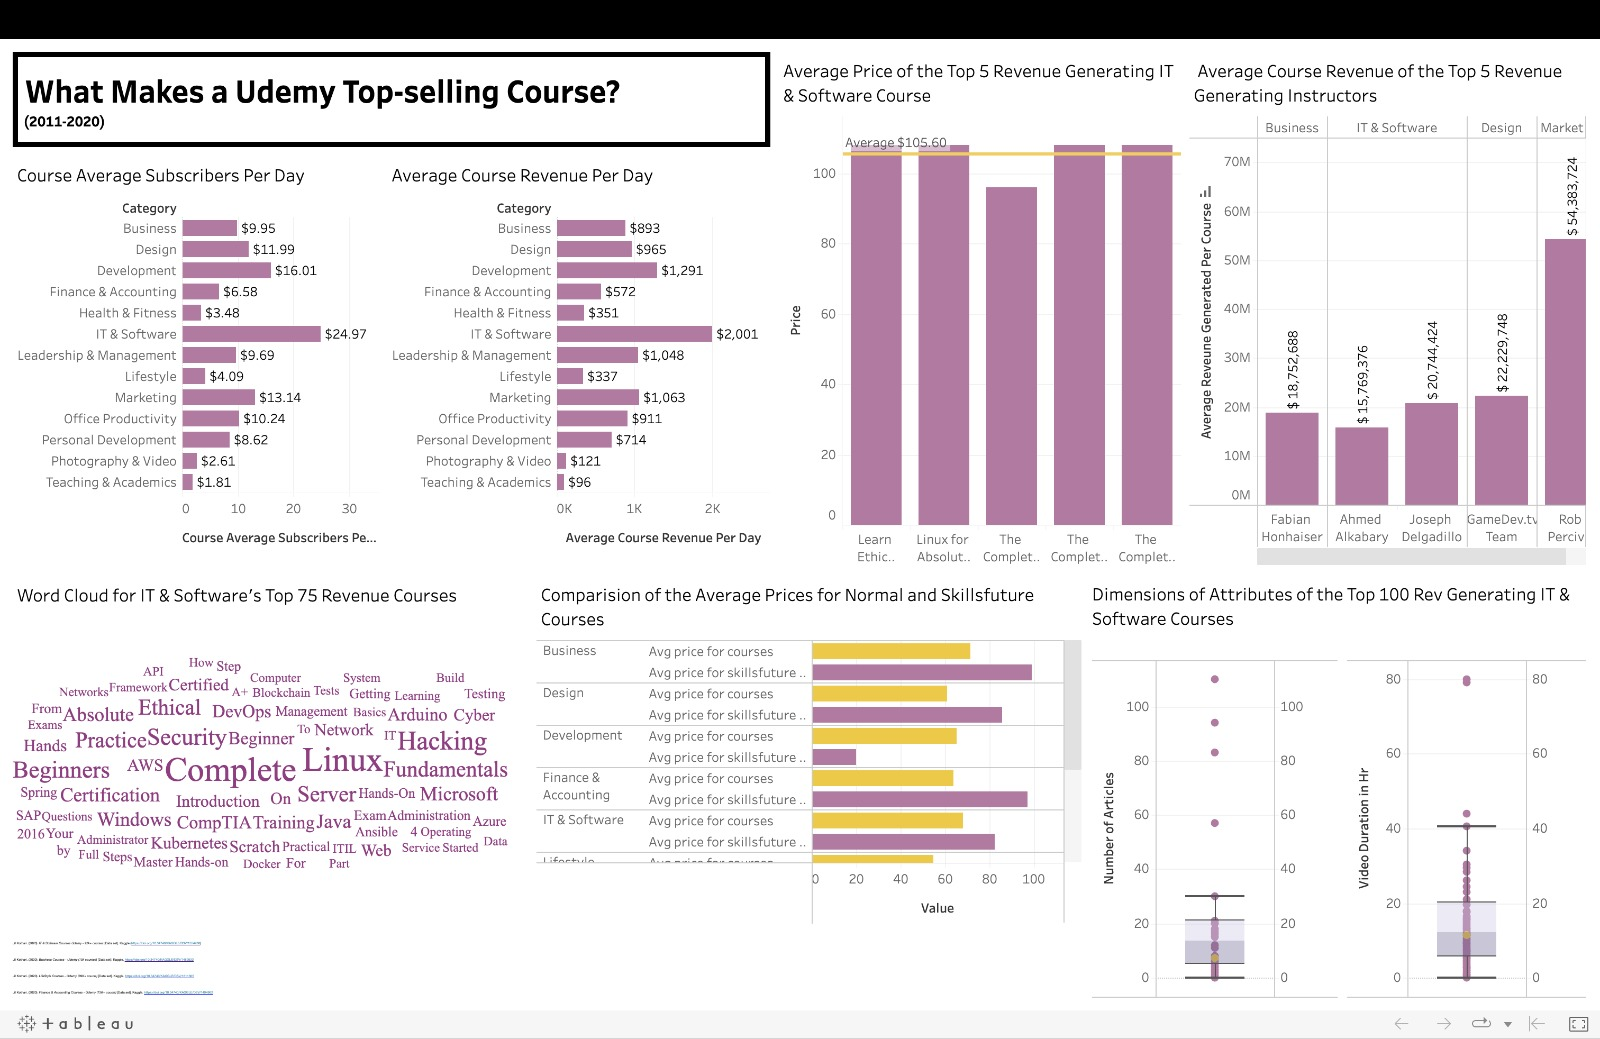

# Credentials
---
- “$67.18 Billion Massive Open Online Course (MOOC) Market - Global Forecast to 2026 - Researchandmarkets.com.” Business Wire, March 15, 2021. https://www.businesswire.com/news/home/20210315005619/en/67.18-Billion-Massive-Open-Online-Course-MOOC-Market---Global-Forecast-to-2026---ResearchAndMarkets.com. 
- “Online Courses - Learn Anything, on Your Schedule.” Udemy. Accessed October 14, 2022. https://www.udemy.com/. 
- “Skillsfuture Credit Guide - Top up, Expiry Date, Course Subsidy / Funding.” Coursemology, January 5, 2022. https://coursemology.sg/training-subsidies-and-awards/skillsfuture-credit/#:~:text=SkillsFuture%20Credit%20consists%20of%20credits,subsidies%20provided%20by%20the%20Government. 
- “Skillsfuture Credit.” Education, Career and Personal Development. Accessed October 15, 2022. https://www.myskillsfuture.gov.sg/content/portal/en/career-resources/career-resources/education-career-personal-development/SkillsFuture_Credit.html. 
- “SMU Academy Launches Inaugural Skillsfuture Career Transition Programme.” SMU Newsroom. Accessed October 14, 2022. https://news.smu.edu.sg/news/2022/08/08/smu-academy-launches-inaugural-skillsfuture-career-transition-programme. 